In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import sys
!{sys.executable} -m pip install missingpy
from sklearn.impute import KNNImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

### Import train and test dataset

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
IndependentVariables = ["age","BMI","heart rate", "Systolic blood pressure", "Diastolic blood pressure", "Respiratory rate","temperature","SP O2","Urine output","hematocrit","RBC","MCH","MCHC","MCV","RDW","Leucocyte","Platelets",\
                             "Neutrophils","Basophils","Lymphocyte" ,"PT","INR","NT-proBNP","Creatine kinase","Creatinine","Urea nitrogen","glucose","Blood potassium","Blood sodium","Blood calcium","Chloride","Anion gap",\
                              "Magnesium ion","PH","Bicarbonate","Lactic acid","PCO2","EF"]
DependentVariables = ["hypertensive","atrialfibrillation","CHD with no MI","diabetes","deficiencyanemias","depression","Hyperlipemia","Renal failure","COPD"]

## Machine Learning

In [5]:
#split the data from our train and test data set to the x and y values for machine learning
X_train = train[IndependentVariables]
y_train1 = train['hypertensive']
y_train2 = train['atrialfibrillation']
y_train3 = train['CHD with no MI']
y_train4 = train['diabetes']
y_train5 = train['deficiencyanemias']
y_train6 = train['depression']
y_train7 = train['Hyperlipemia']
y_train8 = train['Renal failure']
y_train9 = train['COPD']
X_test = test[IndependentVariables]
y_test1 = test['hypertensive']
y_test2 = test['atrialfibrillation']
y_test3 = test['CHD with no MI']
y_test4 = test['diabetes']
y_test5 = test['deficiencyanemias']
y_test6 = test['depression']
y_test7 = test['Hyperlipemia']
y_test8 = test['Renal failure']
y_test9 = test['COPD']

### Random Forest
    We use GridSearch before RandomForest to find the best parameters for the RandomForest model so that we do not need to try
    different parameters multiple times

In [6]:
def RandomForestLin(X_train, X_test,y_train, y_test):
    
    
    
    param_grid = {'n_estimators': np.arange(100,1001,100),  
                  'max_depth': np.arange(2, 11)}             

   
    hpGrid = GridSearchCV(RandomForestClassifier(),  
                          param_grid,                 
                          cv = 5,                     
                          scoring = 'accuracy')       
   
    hpGrid.fit(X_train, y_train.ravel())
    
   
    print(hpGrid.best_estimator_)

   
    print(np.abs(hpGrid.best_score_))
    
    bestdic = hpGrid.best_params_
    a= bestdic['max_depth']
    b= bestdic['n_estimators']
    
   
    rforest = RandomForestClassifier(n_estimators = b,  
                                 max_depth = a)       

    
    rforest.fit(X_train, y_train)
    
    
    y_train_pred = rforest.predict(X_train)
    y_test_pred = rforest.predict(X_test)

    
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", rforest.score(X_train, y_train))
    print()

    
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", rforest.score(X_test, y_test))
    print()

    
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
        
    cm = confusion_matrix(y_train,y_train_pred)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]

    ClassificationAccuracyTrain = (TP+TN)/(TP+FP+FN+TN)
    TruePositiveRateTrain = TP/(FN+TP)
    FalsePositiveRateTrain = FP/(TN+FP)
    FalseNegativeRateTrain = FN/(FN+TP)
    TrueNegativeRateTrain = TN/(TN+FP)

    cm = confusion_matrix(y_test,y_test_pred)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]

    ClassificationAccuracyTest = (TP+TN)/(TP+FP+FN+TN)
    TruePositiveRateTest = TP/(FN+TP)
    FalsePositiveRateTest = FP/(TN+FP)
    FalseNegativeRateTest = FN/(FN+TP)
    TrueNegativeRateTest = TN/(TN+FP)

    print("TruePositiveRateTrain \t:", TruePositiveRateTrain)
    print("FalsePositiveRateTrain \t:", FalsePositiveRateTrain)
    print("TrueNegativeRateTrain \t:", TrueNegativeRateTrain)
    print("FalseNegativeRateTrain \t:", FalseNegativeRateTrain)
    print()

    print("TruePositiveRateTest \t:", TruePositiveRateTest)
    print("FalsePositiveRateTest \t:", FalsePositiveRateTest)
    print("TrueNegativeRateTest \t:", TrueNegativeRateTest)
    print("FalseNegativeRateTest \t:", FalseNegativeRateTest)
    print()

### RandomForest for hypertensive

RandomForestClassifier(max_depth=10, n_estimators=200)
0.7290217268940673
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9500531349628055

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7245762711864406

TruePositiveRateTrain 	: 1.0
FalsePositiveRateTrain 	: 0.17669172932330826
TrueNegativeRateTrain 	: 0.8233082706766918
FalseNegativeRateTrain 	: 0.0

TruePositiveRateTest 	: 0.9647058823529412
FalsePositiveRateTest 	: 0.8939393939393939
TrueNegativeRateTest 	: 0.10606060606060606
FalseNegativeRateTest 	: 0.03529411764705882



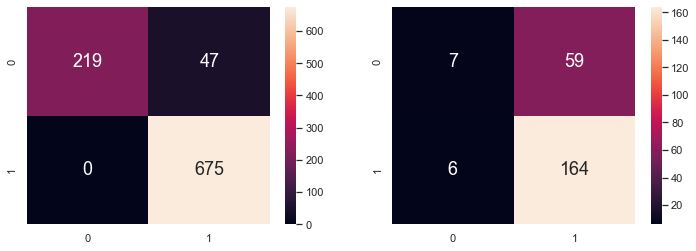

In [7]:
RandomForestLin(X_train, X_test,y_train1, y_test1)

Analysis for hypertensive RandomForest:
    
    Classification Accuracy are pretty decent and True Positive Rate are high too.
    However, False Positive Rate are also very high.

### RandomForest for atrialfibrillation

RandomForestClassifier(max_depth=10)
0.7024597545874143
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.997874601487779

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6949152542372882

TruePositiveRateTrain 	: 0.9954233409610984
FalsePositiveRateTrain 	: 0.0
TrueNegativeRateTrain 	: 1.0
FalseNegativeRateTrain 	: 0.004576659038901602

TruePositiveRateTest 	: 0.5319148936170213
FalsePositiveRateTest 	: 0.19718309859154928
TrueNegativeRateTest 	: 0.8028169014084507
FalseNegativeRateTest 	: 0.46808510638297873



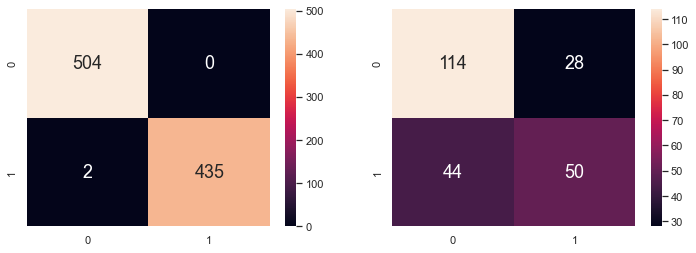

In [8]:
RandomForestLin(X_train, X_test,y_train2, y_test2)

Analysis for atrialfibrillation:
    
    Train Data set results look good
    Classification Accuracy of test data set is a bit low, True Positive value of test data set<0.5 even though True Negative 
    Rate is high

### RandomForest for CHD with no MI

RandomForestClassifier(max_depth=2)
0.9128616458403691
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9128586609989373

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9194915254237288

TruePositiveRateTrain 	: 0.0
FalsePositiveRateTrain 	: 0.0
TrueNegativeRateTrain 	: 1.0
FalseNegativeRateTrain 	: 1.0

TruePositiveRateTest 	: 0.0
FalsePositiveRateTest 	: 0.0
TrueNegativeRateTest 	: 1.0
FalseNegativeRateTest 	: 1.0



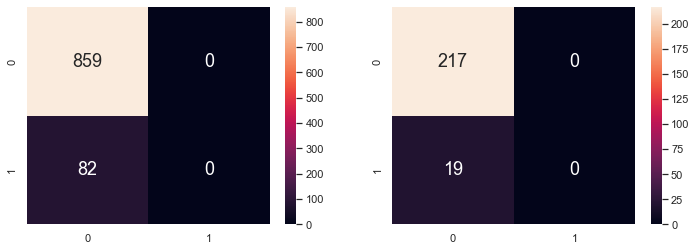

In [9]:
RandomForestLin(X_train, X_test,y_train3, y_test3)

Analsis on Random Forest for CHD with no MI
    
    Classification Accuracy are very high for both train and test data, however all the results predictable are Negative
    This could be due to the imbalance in the Positive and Negative data from the data set
    Resampling is needed 

### RandomForest for diabetes

RandomForestClassifier(max_depth=8, n_estimators=300)
0.725892153551728
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9723698193411264

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6864406779661016

TruePositiveRateTrain 	: 0.9338422391857506
FalsePositiveRateTrain 	: 0.0
TrueNegativeRateTrain 	: 1.0
FalseNegativeRateTrain 	: 0.06615776081424936

TruePositiveRateTest 	: 0.5339805825242718
FalsePositiveRateTest 	: 0.19548872180451127
TrueNegativeRateTest 	: 0.8045112781954887
FalseNegativeRateTest 	: 0.46601941747572817



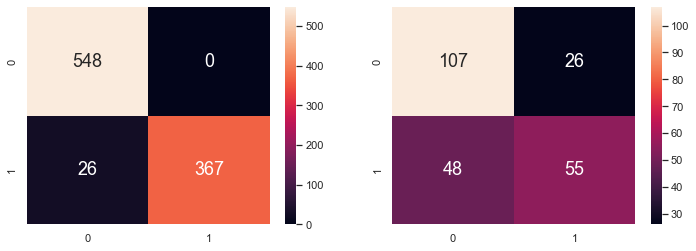

In [10]:
RandomForestLin(X_train, X_test,y_train4, y_test4)

Analysis on Random Forest for diabetes
    
    Very good results from the train data set, however false positive rate for the test data set is a little high

### RandomForest for deficiencyanemias

RandomForestClassifier(max_depth=10, n_estimators=700)
0.7088258471237194
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9893730074388948

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6949152542372882

TruePositiveRateTrain 	: 0.9680511182108626
FalsePositiveRateTrain 	: 0.0
TrueNegativeRateTrain 	: 1.0
FalseNegativeRateTrain 	: 0.03194888178913738

TruePositiveRateTest 	: 0.2558139534883721
FalsePositiveRateTest 	: 0.05333333333333334
TrueNegativeRateTest 	: 0.9466666666666667
FalseNegativeRateTest 	: 0.7441860465116279



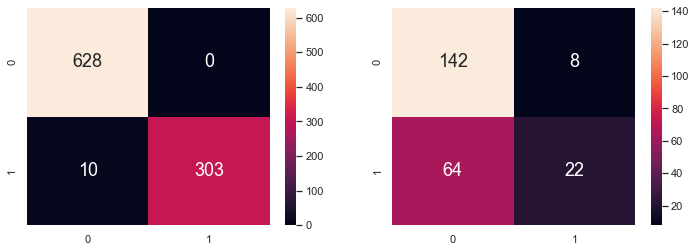

In [11]:
RandomForestLin(X_train, X_test,y_train5, y_test5)

Analsysis of Random Forest for deficiencyanemias:
    
    Again, results for the train data set is pretty good but false negative rate is high for the test set

## RandomForest for depression

RandomForestClassifier(max_depth=2)
0.8809805245975457
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8809776833156217

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8813559322033898

TruePositiveRateTrain 	: 0.0
FalsePositiveRateTrain 	: 0.0
TrueNegativeRateTrain 	: 1.0
FalseNegativeRateTrain 	: 1.0

TruePositiveRateTest 	: 0.0
FalsePositiveRateTest 	: 0.0
TrueNegativeRateTest 	: 1.0
FalseNegativeRateTest 	: 1.0



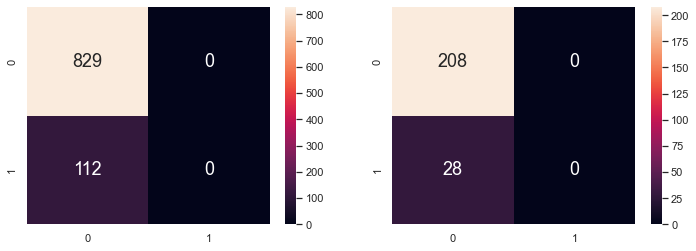

In [12]:
RandomForestLin(X_train, X_test,y_train6, y_test6)

Analsis on Random Forest for depression
    
    All the results predictable are negative.
    RandomForest not a good model to predict depression.
    Maybe depression does not have much correlation to these variables of the physical body or because of the unbalanced 
    data set like CHD with no MI's results

## RandomForest for Hyperlipemia

RandomForestClassifier(max_depth=9, n_estimators=700)
0.6174659461893504
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9989373007438895

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.673728813559322

TruePositiveRateTrain 	: 0.9972972972972973
FalsePositiveRateTrain 	: 0.0
TrueNegativeRateTrain 	: 1.0
FalseNegativeRateTrain 	: 0.002702702702702703

TruePositiveRateTest 	: 0.12987012987012986
FalsePositiveRateTest 	: 0.06289308176100629
TrueNegativeRateTest 	: 0.9371069182389937
FalseNegativeRateTest 	: 0.8701298701298701



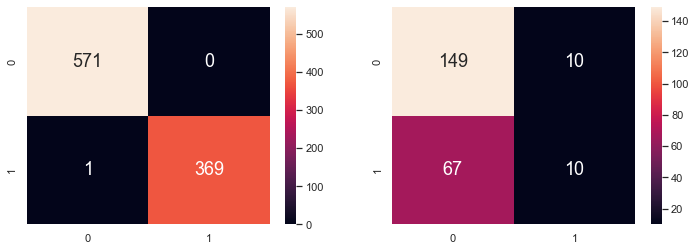

In [14]:
RandomForestLin(X_train, X_test,y_train7, y_test7)

Analysis of RandomForest for Hyperlipemia:

    Test data set have a very inaccurate result for Hyperlipemia since the False Negative Rate is very high

## RandomForest for Renal failure

RandomForestClassifier(max_depth=9, n_estimators=200)
0.8150681076212992
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9936238044633369

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7754237288135594

TruePositiveRateTrain 	: 0.9942363112391931
FalsePositiveRateTrain 	: 0.006734006734006734
TrueNegativeRateTrain 	: 0.9932659932659933
FalseNegativeRateTrain 	: 0.005763688760806916

TruePositiveRateTest 	: 0.6867469879518072
FalsePositiveRateTest 	: 0.17647058823529413
TrueNegativeRateTest 	: 0.8235294117647058
FalseNegativeRateTest 	: 0.3132530120481928



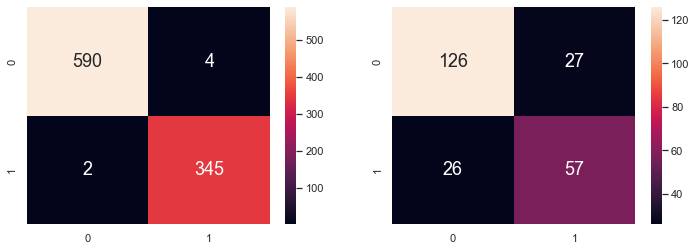

In [15]:
RandomForestLin(X_train, X_test,y_train8, y_test8)

Analysis of RandomForest for Renal failure:
    
        Train set results are very good.
        Test set results are also pretty good since both True Positive Rate and True Negative Rate are more than 0.7
        Renal failure do have a pretty good correlation with all these variables

## RandomForest for COPD

RandomForestClassifier(max_depth=2)
0.9245525160418777
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.924548352816153

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.923728813559322

TruePositiveRateTrain 	: 0.0
FalsePositiveRateTrain 	: 0.0
TrueNegativeRateTrain 	: 1.0
FalseNegativeRateTrain 	: 1.0

TruePositiveRateTest 	: 0.0
FalsePositiveRateTest 	: 0.0
TrueNegativeRateTest 	: 1.0
FalseNegativeRateTest 	: 1.0



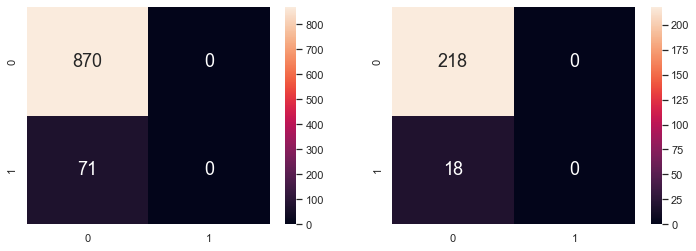

In [16]:
RandomForestLin(X_train, X_test,y_train9, y_test9)

Analysis of RandomForest for COPD:

    Not a good model for COPD as False Negative Rate is very high for the test data set, similar to CHD with no MI, it could be
    because of the very unbalanced data set